<a href="https://colab.research.google.com/github/PainappuruNyan/Python_Pandas/blob/main/police.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [54]:
import pandas as pd

import matplotlib

In [55]:
df = pd.read_csv('/police.csv')

In [56]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 91741 entries, 0 to 91740
Data columns (total 15 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   stop_date           91741 non-null  object 
 1   stop_time           91741 non-null  object 
 2   county_name         0 non-null      float64
 3   driver_gender       86406 non-null  object 
 4   driver_age_raw      86414 non-null  float64
 5   driver_age          86120 non-null  float64
 6   driver_race         86408 non-null  object 
 7   violation_raw       86408 non-null  object 
 8   violation           86408 non-null  object 
 9   search_conducted    91741 non-null  bool   
 10  search_type         3196 non-null   object 
 11  stop_outcome        86408 non-null  object 
 12  is_arrested         86408 non-null  object 
 13  stop_duration       86408 non-null  object 
 14  drugs_related_stop  91741 non-null  bool   
dtypes: bool(2), float64(3), object(10)
memory usage: 9.3+

In [57]:
sexCol = 'driver_gender'
ageCol = 'driver_age'
raceCol = 'driver_race'
arrestCol = 'is_arrested'
drugCol = 'drugs_related_stop'
violation = 'violation'

ageGroup = 'age_group'

In [58]:
df[:15]

,stop_date,stop_time,county_name,driver_gender,driver_age_raw,driver_age,driver_race,violation_raw,violation,search_conducted,search_type,stop_outcome,is_arrested,stop_duration,drugs_related_stop
0,2005-01-02,01:55,NaN,M,1985.0,20.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
1,2005-01-18,08:15,NaN,M,1965.0,40.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
2,2005-01-23,23:15,NaN,M,1972.0,33.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
3,2005-02-20,17:15,NaN,M,1986.0,19.0,White,Call for Service,Other,False,NaN,Arrest Driver,True,16-30 Min,False
4,2005-03-14,10:00,NaN,F,1984.0,21.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
5,2005-03-23,09:45,NaN,M,1982.0,23.0,Black,Equipment/Inspection Violation,Equipment,False,NaN,Citation,False,0-15 Min,False
6,2005-04-01,17:30,NaN,M,1969.0,36.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
7,2005-06-06,13:20,NaN,F,1986.0,19.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
8,2005-07-13,10:15,NaN,M,1970.0,35.0,Black,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False
9,2005-07-13,15:45,NaN,M,1970.0,35.0,White,Speeding,Speeding,False,NaN,Citation,False,0-15 Min,False


In [59]:
df[sexCol][:15]

0     M
1     M
2     M
3     M
4     F
5     M
6     M
7     F
8     M
9     M
10    M
11    F
12    M
13    F
14    M
Name: driver_gender, dtype: object

In [60]:
df[sexCol].value_counts()

M    62895
F    23511
Name: driver_gender, dtype: int64

In [61]:
df[raceCol].value_counts()

White       62158
Black       12244
Hispanic     9507
Asian        2259
Other         240
Name: driver_race, dtype: int64

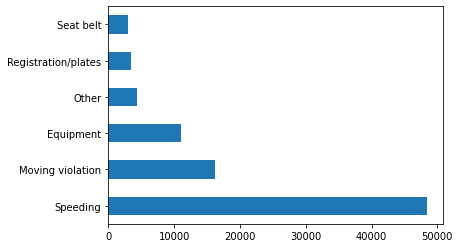

In [62]:
df[violation].value_counts().plot(kind = 'barh')

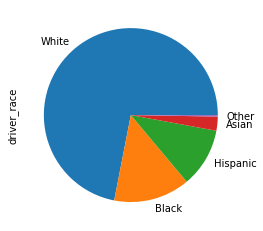

In [63]:
df[raceCol].value_counts().plot.pie()

In [64]:
df[ageCol].mean()

34.011333023687875

In [65]:
df[ageCol].value_counts()

22.0    4125
21.0    4063
23.0    3986
20.0    3794
24.0    3782
        ... 
88.0       2
99.0       1
90.0       1
89.0       1
94.0       1
Name: driver_age, Length: 78, dtype: int64

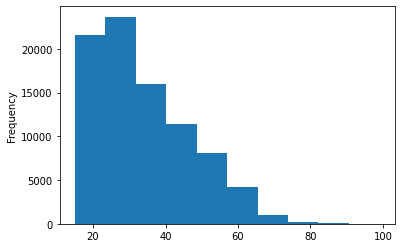

In [66]:
df[ageCol].plot(kind = 'hist')

In [67]:
df[ageGroup] = df[ageCol].map(lambda driver_age : (driver_age // 10))

In [68]:
df[ageGroup].value_counts()

2.0    34992
3.0    18972
4.0    14122
5.0     8862
1.0     5597
6.0     2923
7.0      568
8.0       81
9.0        3
Name: age_group, dtype: int64

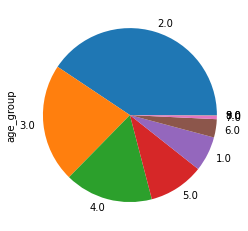

In [69]:
df[ageGroup].value_counts().plot.pie()

In [70]:
df[[raceCol, arrestCol]][:15]

,driver_race,is_arrested
0,White,False
1,White,False
2,White,False
3,White,True
4,White,False
5,Black,False
6,White,False
7,White,False
8,Black,False
9,White,False


In [71]:
race_by_arrested = df.groupby([raceCol, arrestCol])
race_by_arrested.size()

driver_race  is_arrested
Asian        False           2218
             True              41
Black        False          11539
             True             705
Hispanic     False           8941
             True             566
Other        False            238
             True               2
White        False          60543
             True            1615
dtype: int64

In [72]:
race_by_arrested = race_by_arrested.size().unstack()

In [73]:
race_by_arrested

is_arrested,False,True
driver_race,,
Asian,2218,41
Black,11539,705
Hispanic,8941,566
Other,238,2
White,60543,1615


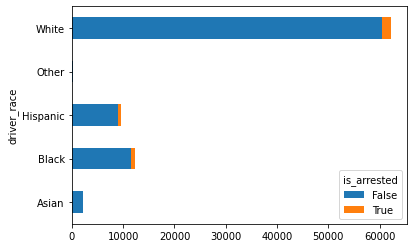

In [74]:
race_by_arrested.plot(kind = 'barh', stacked = True)

In [75]:
def percentage (r):
    return [float(v) / sum(r) for v in r]

race_by_arrested = race_by_arrested.apply(percentage, axis = 1)
race_by_arrested

driver_race
Asian         [0.981850376272687, 0.01814962372731297]
Black         [0.942420777523685, 0.05757922247631493]
Hispanic     [0.9404649205848322, 0.05953507941516777]
Other       [0.9916666666666667, 0.008333333333333333]
White       [0.9740178255413623, 0.025982174458637666]
dtype: object

In [76]:
race_by_arrested = pd.DataFrame(data=race_by_arrested, columns=['a'])
race_by_arrested['False'] = race_by_arrested['a'].apply(lambda x: x[0])
race_by_arrested['True'] = race_by_arrested['a'].apply(lambda x: x[1])
race_by_arrested = race_by_arrested.drop(['a'], axis=1)
race_by_arrested

,False,True
driver_race,,
Asian,0.981850,0.018150
Black,0.942421,0.057579
Hispanic,0.940465,0.059535
Other,0.991667,0.008333
White,0.974018,0.025982


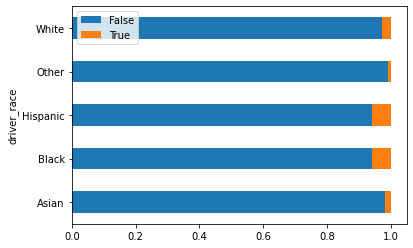

In [77]:
race_by_arrested.plot(kind = 'barh', stacked = True)

In [78]:
df.groupby([sexCol, arrestCol]).size().unstack().apply(percentage, axis=1)

driver_gender
F     [0.9746501637531368, 0.02534983624686317]
M    [0.9629064313538437, 0.037093568646156296]
dtype: object

In [79]:
race_by_drug = df.groupby([raceCol, drugCol])
race_by_drug.size()

driver_race  drugs_related_stop
Asian        False                  2248
             True                     11
Black        False                 12043
             True                    201
Hispanic     False                  9381
             True                    126
Other        False                   239
             True                      1
White        False                 61682
             True                    476
dtype: int64

In [80]:
race_by_drug = race_by_drug.size().unstack()

In [81]:
race_by_drug

drugs_related_stop,False,True
driver_race,,
Asian,2248,11
Black,12043,201
Hispanic,9381,126
Other,239,1
White,61682,476


In [82]:
race_by_drug = race_by_drug.apply(percentage, axis = 1)
race_by_drug

driver_race
Asian        [0.9951305887560867, 0.004869411243913236]
Black        [0.9835837961450506, 0.016416203854949362]
Hispanic     [0.9867466077627012, 0.013253392237298833]
Other        [0.9958333333333333, 0.004166666666666667]
White       [0.9923420959490331, 0.0076579040509668905]
dtype: object

In [83]:
race_by_drug = pd.DataFrame(data=race_by_drug, columns=['b'])
race_by_drug['False'] = race_by_drug['b'].apply(lambda x: x[0])
race_by_drug['True'] = race_by_drug['b'].apply(lambda x: x[1])
race_by_drug = race_by_drug.drop(['b'], axis=1)
race_by_drug

,False,True
driver_race,,
Asian,0.995131,0.004869
Black,0.983584,0.016416
Hispanic,0.986747,0.013253
Other,0.995833,0.004167
White,0.992342,0.007658


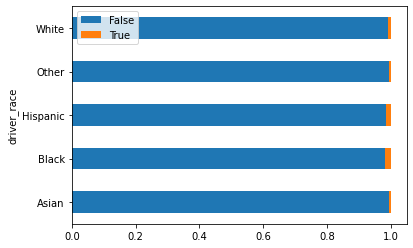

In [84]:
race_by_drug.plot(kind = 'barh', stacked = True)

In [85]:
sex_by_arrested = df.groupby([sexCol, arrestCol]).size().unstack()
sex_by_arrested

is_arrested,False,True
driver_gender,,
F,22915,596
M,60562,2333


In [86]:
sex_by_arrested = sex_by_arrested.apply(percentage, axis = 1)
sex_by_arrested

driver_gender
F     [0.9746501637531368, 0.02534983624686317]
M    [0.9629064313538437, 0.037093568646156296]
dtype: object

In [87]:
sex_by_arrested = pd.DataFrame(data=sex_by_arrested, columns=['c'])
sex_by_arrested['False'] = sex_by_arrested['c'].apply(lambda x: x[0])
sex_by_arrested['True'] = sex_by_arrested['c'].apply(lambda x: x[1])
sex_by_arrested = sex_by_arrested.drop(['c'], axis=1)
sex_by_arrested

,False,True
driver_gender,,
F,0.974650,0.025350
M,0.962906,0.037094


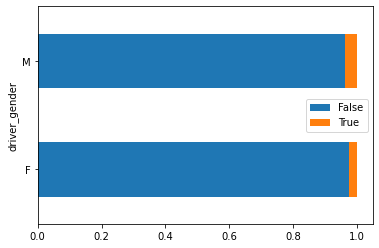

In [88]:
sex_by_arrested.plot(kind = 'barh', stacked = True)